## Bayesian Calibration: Acceleration due to Gravity

To illustrate how to use XXX within YYY we will start with a very simple example of a falling ball example.

First, import the main libraries we use for this example:

In [31]:
import numpy as np
from scipy.stats import norm
from pyDOE import *
import scipy.optimize as spo
import sys
import os

### Data: Acceleration due to Gravity

Let's read the real data first, and then visualize:

In [7]:
ball = np.loadtxt('ball.csv', delimiter=',')
n = len(ball)
#height
X = np.reshape(ball[:, 0], (n, 1))
#time
Y = np.reshape(ball[:, 1], ((n, 1)))

(63, 2)


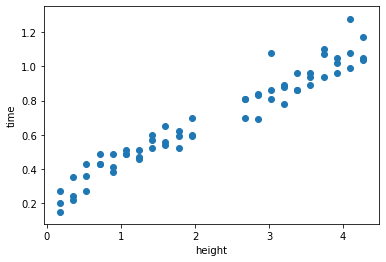

In [6]:
plt.scatter(X, Y)
plt.xlabel("height")
plt.ylabel("time")
plt.show()

### Computer model experiments

We know that $t = \sqrt{2h/g}$.

In [26]:
#Computer implementation of the mathematical model
def timedrop(x, theta, hr, gr):
    min_g = min(gr)
    range_g = max(gr) - min(gr)
    min_h = min(hr)
    range_h = max(hr) - min(hr)
    f = np.zeros((theta.shape[0], x.shape[0]))
    for k in range(0, theta.shape[0]):
        g = range_g*theta[k] + min_g
        h = range_h*x + min(hr)
        f[k, :] = np.sqrt(2*h/g).reshape(x.shape[0])
    return f.T

Consider computer model emulator where $u \in [0, 30]$:

In [110]:
n1 = 150
hvec = lhs(1, samples=n1)
height_range = np.array([min(X), max(X)])
print(np.shape(hvec))

# Draw 50 random parameters from uniform prior
n2 = 100
thetavec = lhs(1, samples=n2)
theta_range = np.array([1, 30])
print(np.shape(thetavec))

# Obtain computer model output
Y_model = timedrop(hvec, thetavec, height_range, theta_range)
print(np.shape(Y_model))

(150, 1)
(100, 1)
(150, 100)


### Building an emulator via XXX

In [111]:
SCRIPT_DIR = os.getcwd()
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, '..')))
from base.emulation import emulator

#### Emulator without filtering

In [112]:
emulator_model = emulator(hvec, thetavec, Y_model, method = 'PCGPwM')

Let's observe the quality of an emulator without filtering:

In [113]:
#Predict
Xscale = (X[0:21] - min(X))/(max(X)- min(X))
print(np.shape(hvec))
print(np.shape(thetavec))
print(np.shape(Xscale))
pred_model = emulator_model.predict(hvec, thetavec)
pred_mean = pred_model.mean()
print(np.shape(pred_mean))

(150, 1)
(100, 1)
(21, 1)
(150, 100)


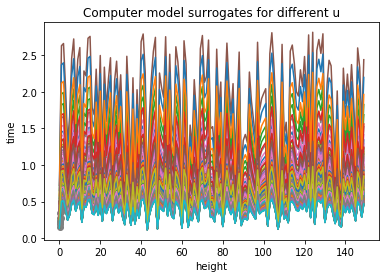

In [114]:
plt.scatter(X, Y, color = 'grey')
for i in range(np.shape(pred_mean)[1]):
    plt.plot(pred_mean[:, i])
plt.xlabel("height")
plt.ylabel("time")
plt.title("Computer model surrogates for different u")
plt.show()

#### Emulator with filtering

(150, 1)
(100, 1)
(150, 100)
(150, 1)
(100, 1)
(150, 100)


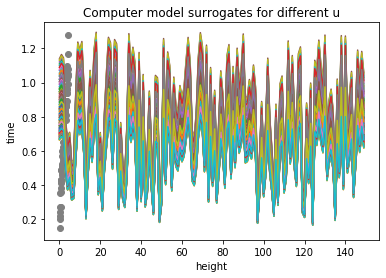

In [115]:
n1 = 150
hvec = lhs(1, samples=n1)
height_range = np.array([min(X), max(X)])
print(np.shape(hvec))

# Draw 50 random parameters from uniform prior
n2 = 100
thetavec = lhs(1, samples=n2)
theta_range = np.array([5, 15])
print(np.shape(thetavec))

# Obtain computer model output
Y_model = timedrop(hvec, thetavec, height_range, theta_range)
print(np.shape(Y_model))

emulator_model = emulator(hvec, thetavec, Y_model, method = 'PCGPwM')

#Predict
print(np.shape(hvec))
print(np.shape(thetavec))
pred_model = emulator_model.predict(hvec, thetavec)
pred_mean = pred_model.mean()
print(np.shape(pred_mean))

plt.scatter(X, Y, color = 'grey')
for i in range(np.shape(pred_mean)[1]):
    plt.plot(pred_mean[:, i])
plt.xlabel("height")
plt.ylabel("time")
plt.title("Computer model surrogates for different u")
plt.show()